In [2]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import math
import warnings
warnings.filterwarnings('ignore')
import pickle
import copy
from pathlib import Path


In [3]:
#Importing Data Science library
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier,BaggingRegressor
from sklearn.utils import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import xgboost as xgb
import sklearn

In [4]:
#Import Deep learning library

import torch
from torch import nn

In [5]:
#Getting the data
df = pd.read_csv('_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Understanding the Data
#Question to ask

1) Sample of the data
2) Shape of the data
3) Columns name of the dataset
4) Stastical info about the dataset
5) More info about the dataset
6) Skewness in the dataset
7) Correlation between the features
8) Null values
9) Duplicates in the dataset

In [6]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1824,0794-YVSGE,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.30,1401.15,No
5293,2242-MFOTG,Male,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),80.10,2603.3,No
985,9369-XFEHK,Female,1,Yes,No,33,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.60,2656.5,Yes
1593,0620-XEFWH,Male,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.2,No


In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
original_memory = df.memory_usage().sum()

In [12]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.duplicated().sum()

0

Coverting the dtype for effeciency

In [16]:
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6986,3976-BWUCK,Female,0,Yes,No,30,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),94.10,2804.45,Yes
3709,2103-ZRXFN,Male,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,50.75,50.75,No


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']

In [20]:
lst = []
binary_lst = []
categorical_lst = []
for col in columns:
    if len(df[col].unique()) < 10:
        print(f"{col} : {df[col].unique()}")
        lst.append(col)
        if ((len(df[col].unique()) == 2)) and (('Yes' in df[col].unique()) and ('No' in df[col].unique())):
            binary_lst.append(col)
        else:
            categorical_lst.append(col)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
len(lst),len(binary_lst),len(categorical_lst)

(16, 5, 11)

In [22]:
def dtype_conv(dataframe,category_lst,binary_lst):
    
    for col in category_lst:
        df[col] = df[col].astype('category')
    for col in binary_lst:
        df[col] = df[col].map({'Yes' : True, 'No' : False})
    
    return df

In [23]:
df = dtype_conv(dataframe = df,category_lst = categorical_lst,binary_lst = binary_lst)

In [24]:
lst = []
for row,i in enumerate(df.TotalCharges.values):
    try:
        float(i)
    except:
        print(f"Row : {row}, value : .{i}.")
        lst.append(row)
    

Row : 488, value : . .
Row : 753, value : . .
Row : 936, value : . .
Row : 1082, value : . .
Row : 1340, value : . .
Row : 3331, value : . .
Row : 3826, value : . .
Row : 4380, value : . .
Row : 5218, value : . .
Row : 6670, value : . .
Row : 6754, value : . .


In [25]:
lst

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [26]:
def rows_id(dataframe, rows_lst):
    
    id_lst = []
    for row in rows_lst:
        id = dataframe.iloc[row]['customerID']
        id_lst.append(id)
        
    return id_lst

In [27]:
id_lst = rows_id(dataframe = df,rows_lst = lst)

In [28]:
id_lst

['4472-LVYGI',
 '3115-CZMZD',
 '5709-LVOEQ',
 '4367-NUYAO',
 '1371-DWPAZ',
 '7644-OMVMY',
 '3213-VVOLG',
 '2520-SGTTA',
 '2923-ARZLG',
 '4075-WKNIU',
 '2775-SEFEE']

In [29]:
for id in id_lst:
    df = df[df['customerID'] != id].copy()

In [30]:
df.shape

(7032, 21)

In [31]:
lst = []
for row,i in enumerate(df.TotalCharges.values):
    try:
        float(i)
    except:
        print(f"Row : {row}, value : .{i}.")
        lst.append(row)

In [32]:
df.reset_index(drop=True,inplace=True)

In [33]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   bool    
 4   Dependents        7032 non-null   bool    
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   bool    
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [35]:
ap_memory = df.memory_usage().sum()

In [36]:
print(f"Memory reduced to : {(ap_memory/original_memory)*100 : 0.2f}%")

Memory reduced to :  33.42%


Exploratory Data Analysis

Univariate data analysis

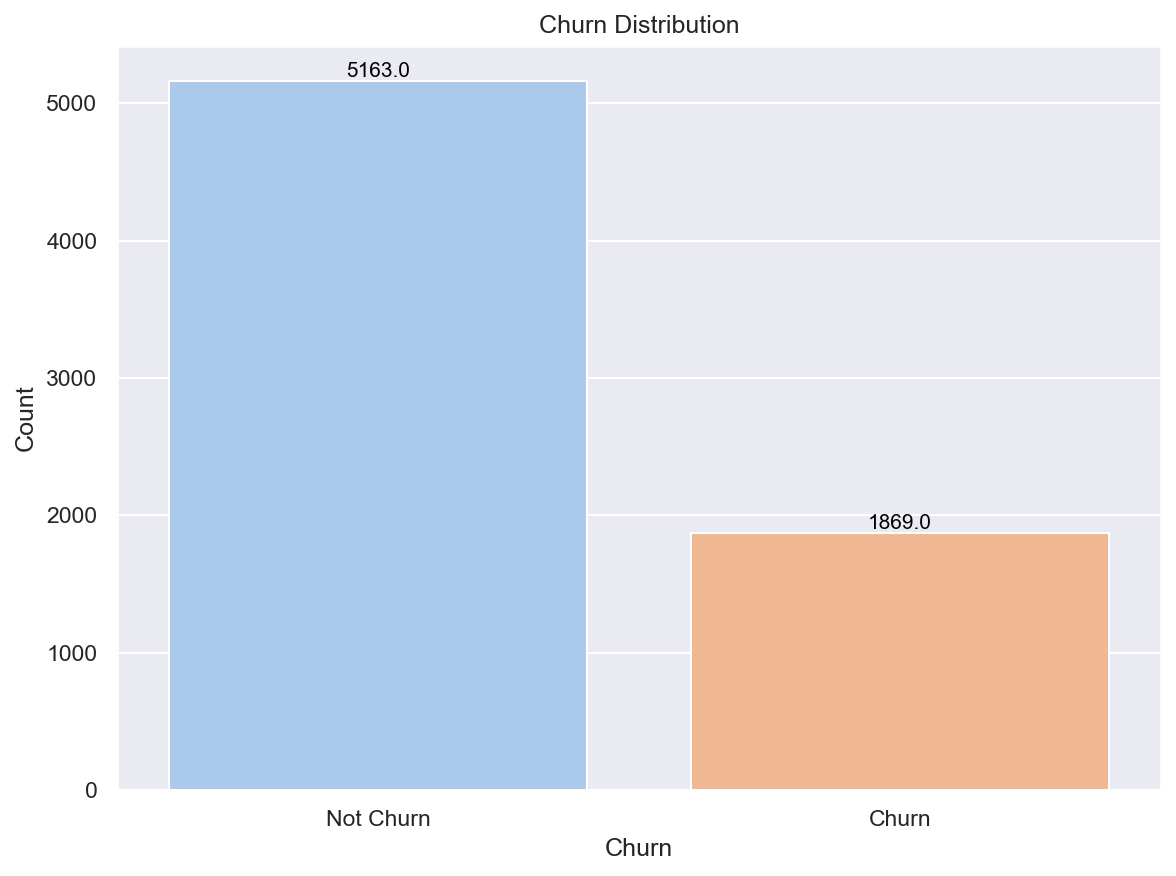

In [37]:
# Set the Seaborn theme and style
sns.set_theme(palette='pastel', style='darkgrid')

# Create the count plot
plt.figure(figsize=(8, 6),dpi = 150)  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='Churn')

# Add informative labels and titles
ax.set_title('Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticklabels(['Not Churn', 'Churn'])  # Custom tick labels

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent overlapping

# Show the plot
plt.show()


In [38]:
df['Churn'].value_counts()


False    5163
True     1869
Name: Churn, dtype: int64

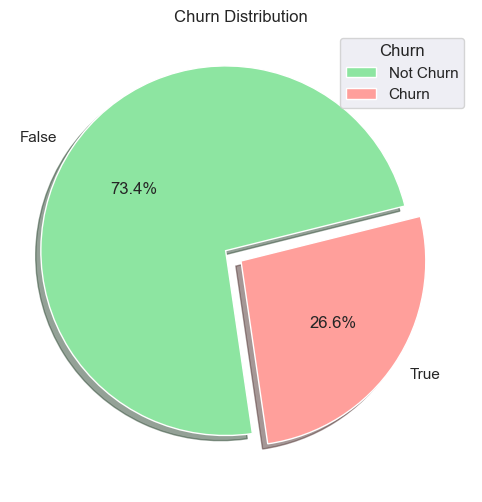

In [39]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.keys()

# Explode the slices to emphasize 'Churn' and 'Not Churn' segments
explode = (0.1, 0)

# Colors for the pie chart
colors = [sns.color_palette('pastel')[2], sns.color_palette('pastel')[3]]

# Create a pie chart
plt.figure(figsize=(8, 6),dpi = 100)
plt.pie(churn_counts, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=14)
plt.title('Churn Distribution')
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()


The data is highly imbalanced

In [40]:
binary_lst

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

<Figure size 640x480 with 0 Axes>

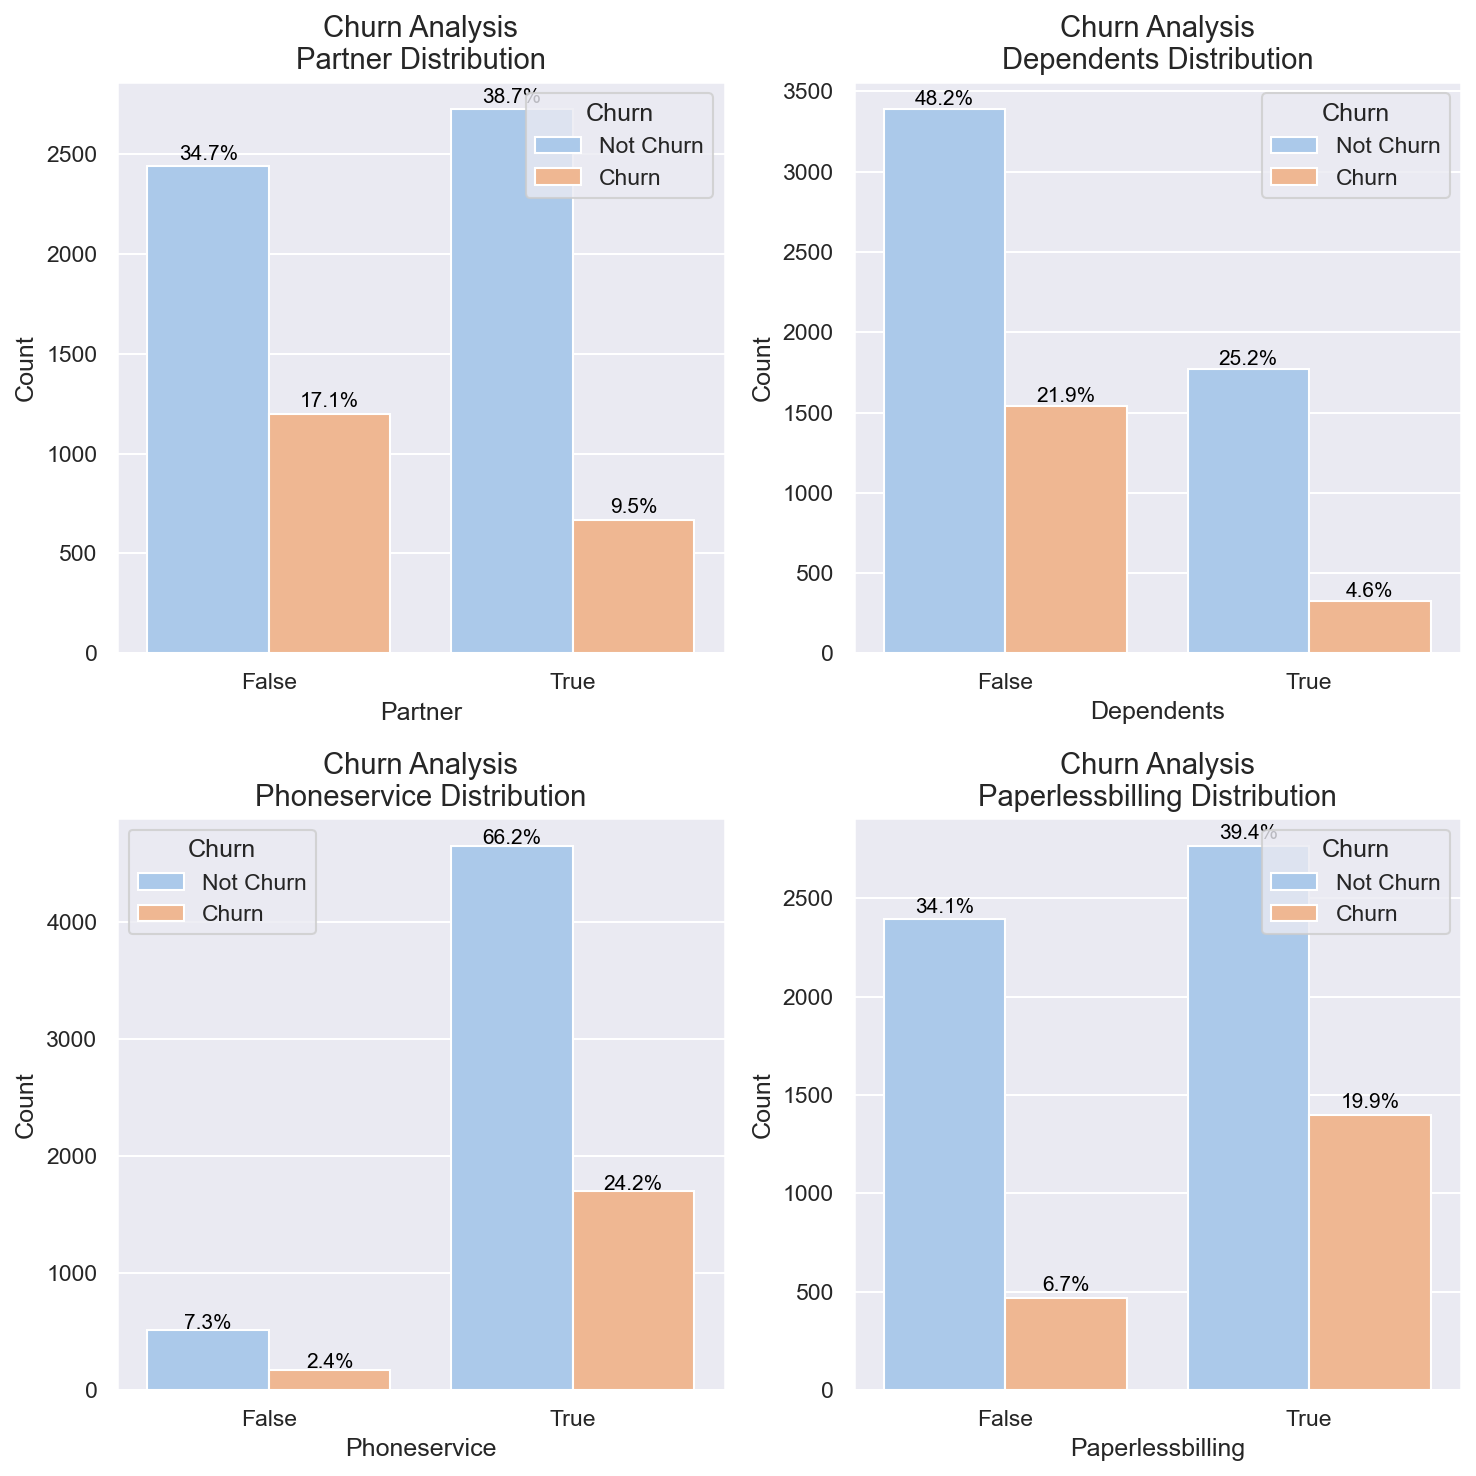

In [41]:
plt.suptitle('Churn Analysis by Binary Features', fontsize=16)

plt.figure(figsize = (10,10),dpi = 150)

# Enumerate through binary_lst and create count plots
for num, col in enumerate(binary_lst[:-1], start=1):
    
    plt.subplot(2,2,num)
    
    ax = sns.countplot(data=df, x=col, hue='Churn')
    
    ax.set_title(f'Churn Analysis\n{col.capitalize()} Distribution', fontsize=14)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn', labels=['Not Churn', 'Churn'],loc = 0)
    
    # Annotate with percentages
    total_count = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()+60), ha='center', va='center', fontsize=10, color='black')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

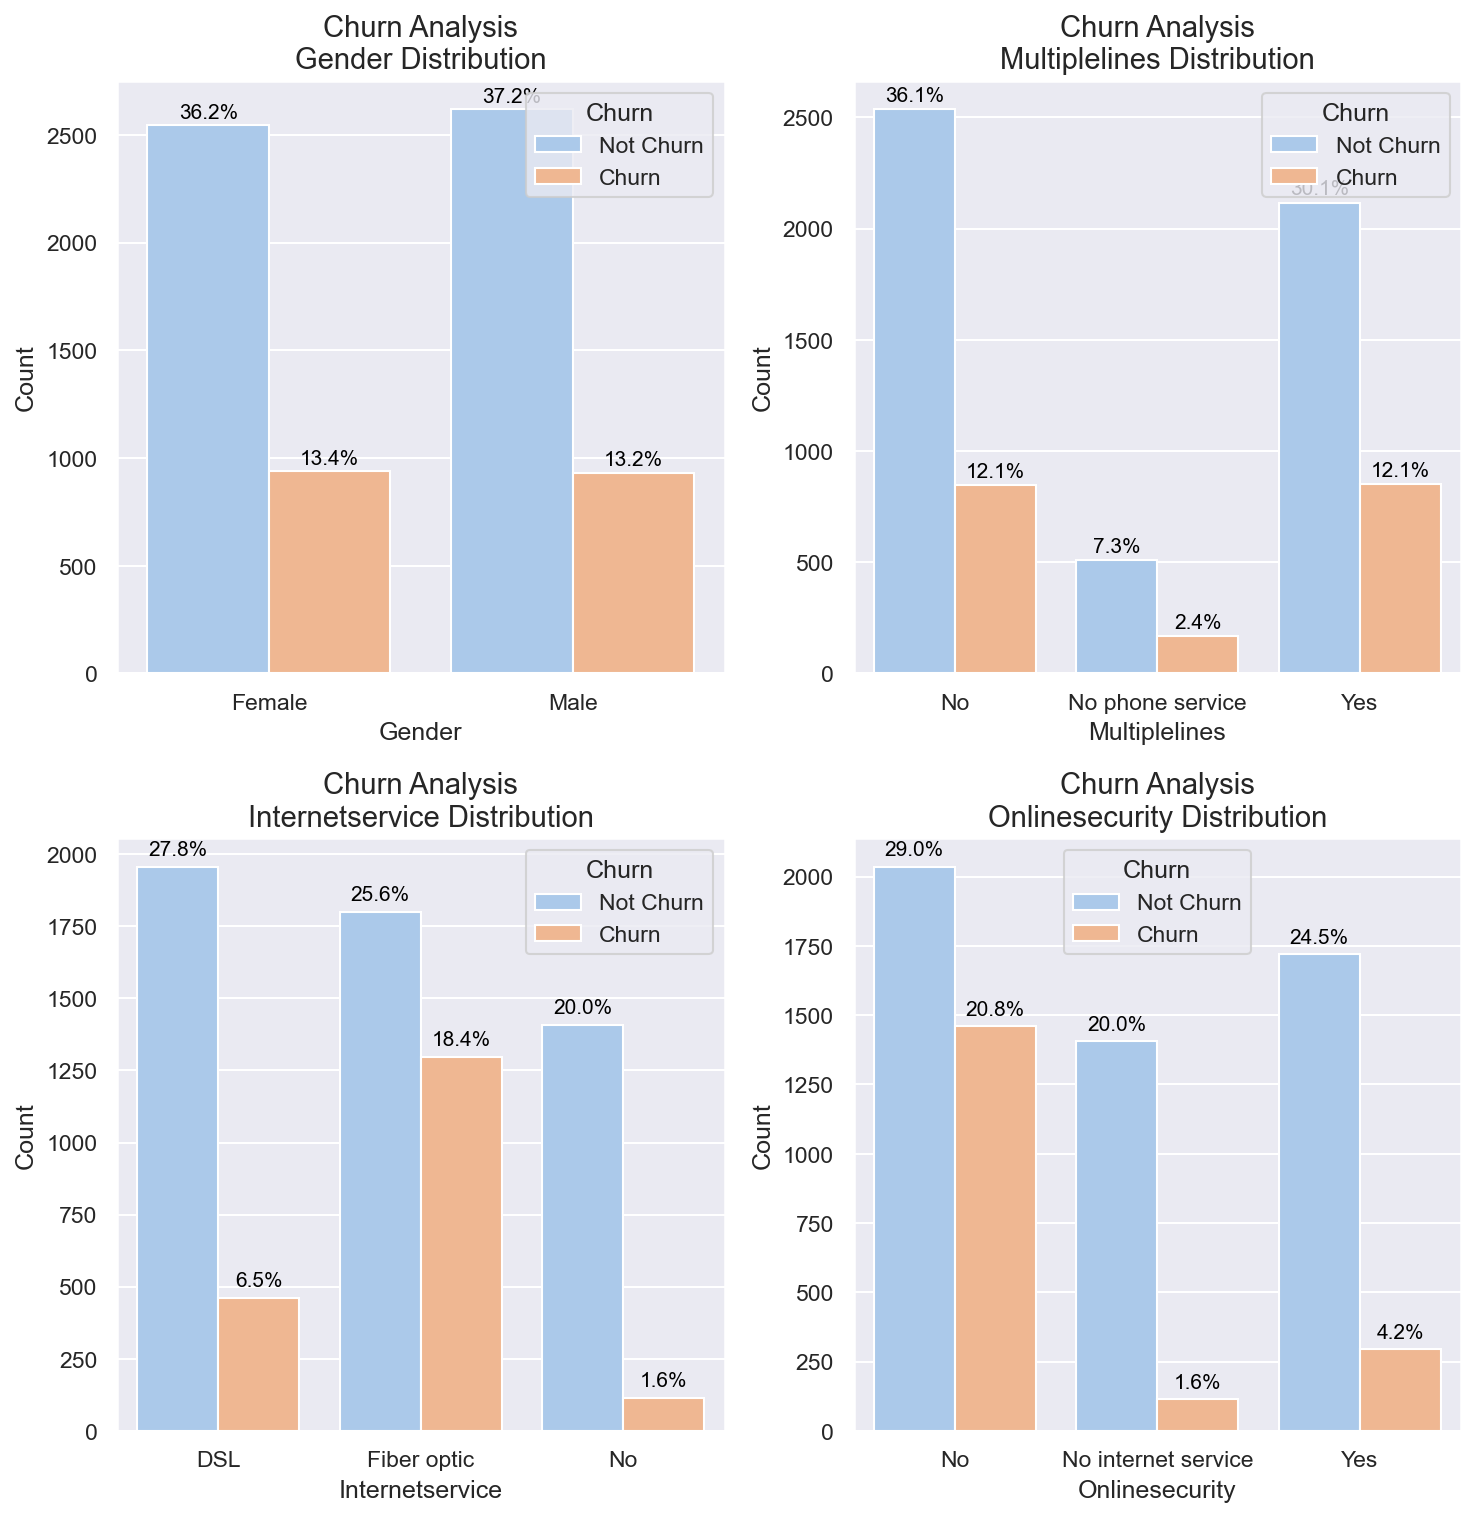

In [42]:
plt.suptitle('Churn Analysis by Categorical Features', fontsize=16)

plt.figure(figsize = (10,30),dpi = 150)

# Enumerate through binary_lst and create count plots
for num, col in enumerate(categorical_lst[:4], start=1):
    
    plt.subplot(6,2,num)
    
    ax = sns.countplot(data=df, x=col, hue='Churn')
    
    ax.set_title(f'Churn Analysis\n{col.capitalize()} Distribution', fontsize=14)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn', labels=['Not Churn', 'Churn'],loc = 0)
    
    # Annotate with percentages
    total_count = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()+60), ha='center', va='center', fontsize=10, color='black')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

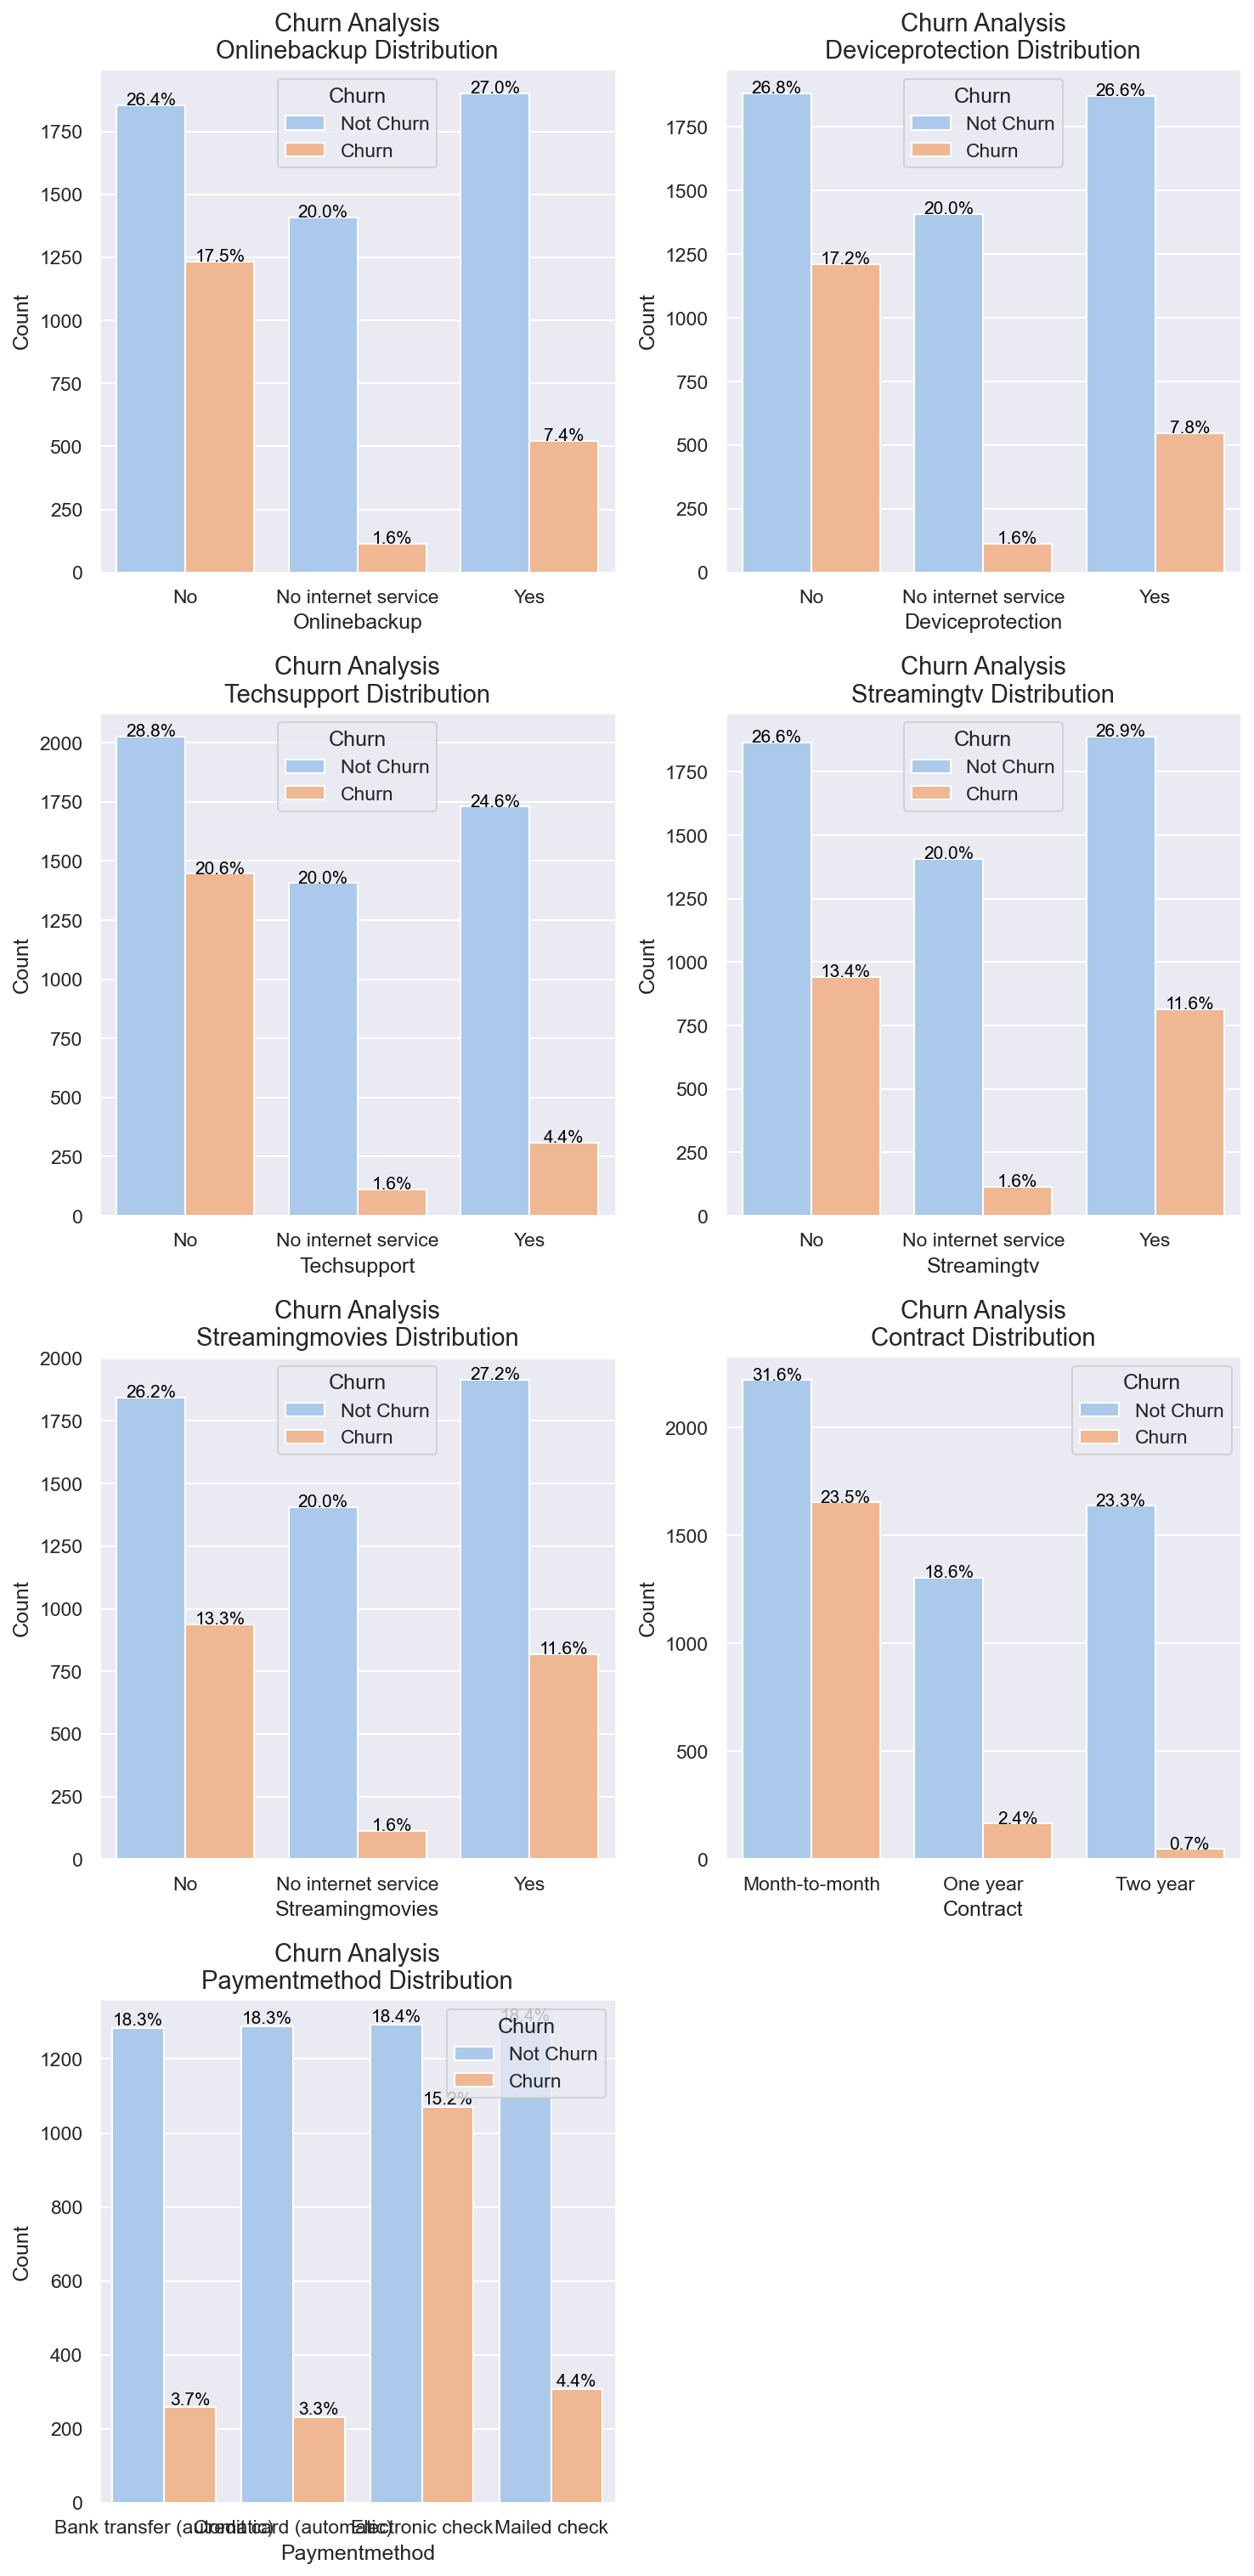

In [43]:
plt.suptitle('Churn Analysis by Categorical Features', fontsize=16)

plt.figure(figsize = (10,30),dpi = 150)

# Enumerate through binary_lst and create count plots
for num, col in enumerate(categorical_lst[4:], start=1):
    
    plt.subplot(6,2,num)
    
    ax = sns.countplot(data=df, x=col, hue='Churn')
    
    ax.set_title(f'Churn Analysis\n{col.capitalize()} Distribution', fontsize=14)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn', labels=['Not Churn', 'Churn'],loc = 0)
    #plt.xticks(rotation = 45)
    
    # Annotate with percentages
    total_count = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()+20), ha='center', va='center', fontsize=10, color='black')
        

# Adjust layout and spacing
plt.tight_layout()
plt.show()

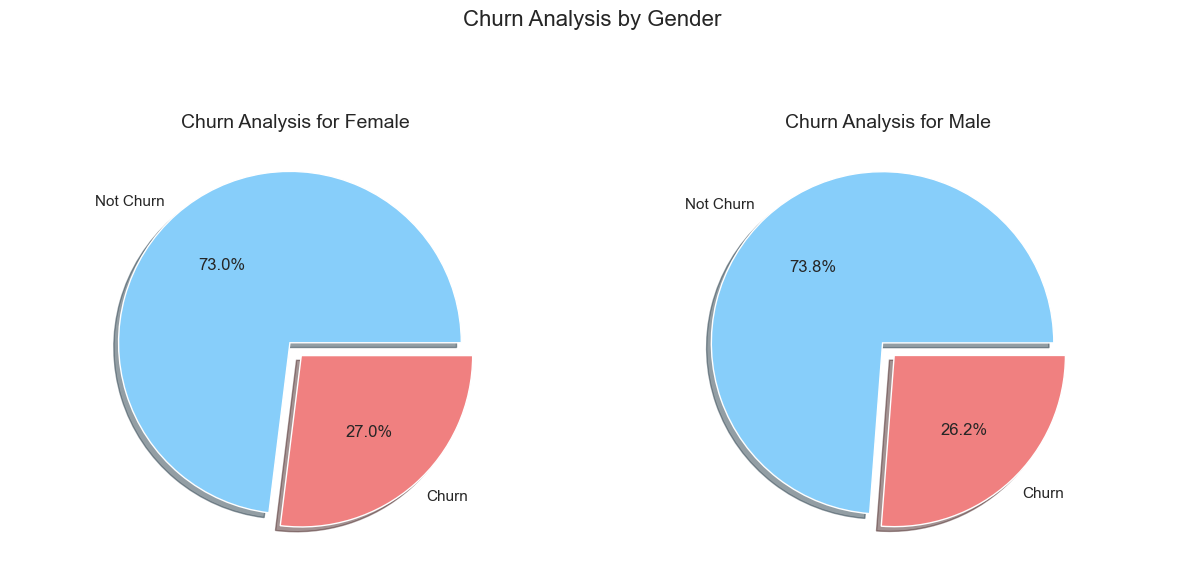

In [44]:
# Calculate churn distribution based on 'gender'
churn_dist = (df.groupby(['gender', 'Churn']).count()['customerID'] / df.shape[0]) * 100

# Create a 1x2 grid of pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Churn Analysis by Gender', fontsize=16)

# Loop through genders and create pie charts
for idx, gender in enumerate(churn_dist.index.levels[0]):
    ax = axes[idx]
    labels = ['Not Churn', 'Churn']
    colors = ['lightskyblue', 'lightcoral']
    explode = (0.1, 0)  # explode 1st slice
    
    churn_counts = churn_dist[gender].values
    ax.pie(churn_counts, labels=labels, colors=colors, explode=explode,
           autopct='%1.1f%%', shadow=True)
    
    ax.set_title(f'Churn Analysis for {gender}', fontsize=14)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


In [45]:
from itertools import combinations

In [46]:
list(combinations([1,2,3],2))

[(1, 2), (1, 3), (2, 3)]

In [47]:
def churn_percentage(col,threshold = None):
    categories = list(df[col].unique())
    categories.sort(reverse=True)
    
    lst = []

    for category in categories:
        temp_df = df[df[col] == category]
        size_temp_df = temp_df.shape[0]
        ser = (temp_df.groupby([col,'Churn']).count()['customerID']/size_temp_df)*100
        if threshold is None:
            print(ser[ser != 0],'\n')
        else:
            lst.append(ser[ser != 0].values[0])
    
    if len(lst) == len(categories):
        combination = list(combinations(lst,2))
        max_difference = 0
        for _ in combination:
            difference = abs(_[0] - _[1])
            if difference > max_difference:
                max_difference = difference
        if max_difference > threshold:
            for category in categories:
                temp_df = df[df[col] == category]
                size_temp_df = temp_df.shape[0]
                ser = (temp_df.groupby([col,'Churn']).count()['customerID']/size_temp_df)*100
                print(ser[ser != 0],'\n')
        else:
            print(f'Not enough difference : {max_difference : 0.2f}','\n')
                   
        

In [48]:
for col in categorical_lst:
    print('*'*10,col.upper(),'*'*10)
    churn_percentage(col,10)

********** GENDER **********
Not enough difference :  0.75 

********** MULTIPLELINES **********
Not enough difference :  3.65 

********** INTERNETSERVICE **********
InternetService  Churn
No               False    92.565789
                 True      7.434211
Name: customerID, dtype: float64 

InternetService  Churn
Fiber optic      False    58.107235
                 True     41.892765
Name: customerID, dtype: float64 

InternetService  Churn
DSL              False    81.001656
                 True     18.998344
Name: customerID, dtype: float64 

********** ONLINESECURITY **********
OnlineSecurity  Churn
Yes             False    85.359801
                True     14.640199
Name: customerID, dtype: float64 

OnlineSecurity       Churn
No internet service  False    92.565789
                     True      7.434211
Name: customerID, dtype: float64 

OnlineSecurity  Churn
No              False    58.221333
                True     41.778667
Name: customerID, dtype: float64 

**********

Based on the provided output from the `churn_percentage` function, let's draw some conclusions about the churn rates for different categorical variables in your dataset.

1. **GENDER**:
   Not enough difference: 0.75%

   It seems that there isn't a significant difference in churn rates based on gender.

2. **MULTIPLELINES**:
   Not enough difference: 3.65%

   Churn rates among customers with different multiple lines usage show a relatively small variation.

3. **INTERNETSERVICE**:
   - DSL: Churn rate - 18.99%
   - Fiber optic: Churn rate - 41.89%
   - No internet service: Churn rate - 7.43%

   Customers with Fiber optic internet service have a substantially higher churn rate compared to DSL users.

4. **ONLINESECURITY**:
   - No online security: Churn rate - 41.78%
   - Online security: Churn rate - 14.64%

   Customers without online security tend to churn more compared to those with online security.

5. **ONLINEBACKUP**:
   - No online backup: Churn rate - 39.94%
   - Online backup: Churn rate - 21.57%

   Churn rates are notably higher for customers without online backup.

6. **DEVICEPROTECTION**:
   - No device protection: Churn rate - 39.14%
   - Device protection: Churn rate - 22.54%

   Churn rates are higher for customers without device protection.

7. **TECHSUPPORT**:
   - No tech support: Churn rate - 41.65%
   - Tech support: Churn rate - 15.20%

   Churn rates are higher for customers without tech support.

8. **STREAMINGTV**:
   - No streaming TV: Churn rate - 33.54%
   - Streaming TV: Churn rate - 30.11%

   Churn rates for streaming TV and non-streaming TV customers are relatively close.

9. **STREAMINGMOVIES**:
   - No streaming movies: Churn rate - 33.73%
   - Streaming movies: Churn rate - 29.95%

   Churn rates for streaming movies and non-streaming movies customers are also relatively close.

10. **CONTRACT**:
    - Month-to-month: Churn rate - 42.71%
    - One year: Churn rate - 11.28%
    - Two year: Churn rate - 2.85%

    Month-to-month contract customers exhibit the highest churn rate, followed by one-year contracts and then two-year contracts.

11. **PAYMENTMETHOD**:
    - Electronic check: Churn rate - 45.29%
    - Mailed check: Churn rate - 19.20%
    - Credit card: Churn rate - 15.25%
    - Bank transfer: Churn rate - 16.73%

    Customers who use electronic checks have the highest churn rate, while those using bank transfer and credit card payment methods have relatively lower churn rates.

In conclusion, several categorical variables such as Internet Service Type, Contract Type, and Payment Method seem to have a significant impact on churn rates. Customers with Fiber optic internet service, month-to-month contracts, and those using electronic checks as a payment method are more likely to churn. On the other hand, customers with longer contract durations (two-year) and using credit card or bank transfer payments exhibit lower churn rates.

In [49]:
for col in binary_lst[:-1]:
    print('*'*10,col.upper(),'*'*10)
    churn_percentage(col,10)

********** PARTNER **********
Partner  Churn
True     False    80.282935
         True     19.717065
Name: customerID, dtype: float64 

Partner  Churn
False    False    67.023908
         True     32.976092
Name: customerID, dtype: float64 

********** DEPENDENTS **********
Dependents  Churn
True        False    84.468795
            True     15.531205
Name: customerID, dtype: float64 

Dependents  Churn
False       False    68.72086
            True     31.27914
Name: customerID, dtype: float64 

********** PHONESERVICE **********
Not enough difference :  1.75 

********** PAPERLESSBILLING **********
PaperlessBilling  Churn
True              False    66.410749
                  True     33.589251
Name: customerID, dtype: float64 

PaperlessBilling  Churn
False             False    83.624302
                  True     16.375698
Name: customerID, dtype: float64 



Here are the conclusions for the binary variables based on the output you provided:

1. **PARTNER**:
   - Having a partner: Churn rate - 19.72%
   - No partner: Churn rate - 32.98%

   Customers with partners tend to have a lower churn rate compared to those without partners.

2. **DEPENDENTS**:
   - Having dependents: Churn rate - 15.53%
   - No dependents: Churn rate - 31.28%

   Customers with dependents exhibit a lower churn rate compared to those without dependents.

3. **PHONESERVICE**:
   Not enough difference: 1.75%

   The churn rate for customers with and without phone service is very close, indicating that phone service might not significantly influence churn rates.

4. **PAPERLESSBILLING**:
   - Paperless billing: Churn rate - 33.59%
   - No paperless billing: Churn rate - 16.38%

   Customers who opt for paperless billing tend to have a higher churn rate compared to those who don't.

In summary, having a partner, having dependents, and choosing paperless billing seem to influence churn rates, with customers who have partners or dependents, and those who choose paperless billing, exhibiting lower churn rates. The presence or absence of phone service doesn't appear to have a significant impact on churn rates based on the provided data.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   bool    
 4   Dependents        7032 non-null   bool    
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   bool    
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [51]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : False,1 : True})

In [52]:
df['tenure'].max()

72

In [53]:
df['tenure'].min()

1

Feature Transformation

In [54]:
def tenure_converter(val):
    if 0<val<13:
        return 1
    elif 12<val<25:
        return 2
    elif 24<val<37:
        return 3
    elif 36<val<49:
        return 4
    elif 48 < val < 60:
        return 5
    else:
        return 6

In [55]:
df['tenure'] = df['tenure'].apply(tenure_converter)

In [56]:
df['tenure'].value_counts().sort_index()

1    2175
2    1024
3     832
4     762
5     756
6    1483
Name: tenure, dtype: int64

In [57]:
churn_percentage('tenure')

tenure  Churn
6       False    93.324343
        True      6.675657
Name: customerID, dtype: float64 

tenure  Churn
5       False    84.920635
        True     15.079365
Name: customerID, dtype: float64 

tenure  Churn
4       False    80.971129
        True     19.028871
Name: customerID, dtype: float64 

tenure  Churn
3       False    78.365385
        True     21.634615
Name: customerID, dtype: float64 

tenure  Churn
2       False    71.289062
        True     28.710938
Name: customerID, dtype: float64 

tenure  Churn
1       False    52.321839
        True     47.678161
Name: customerID, dtype: float64 



Based on the churn rates for different tenure periods, we can draw the following conclusions:

1. **Tenure = 6 years**:
   - Churn rate: 6.68%

   Customers with a tenure of 6 years have a relatively low churn rate.

2. **Tenure = 5 years**:
   - Churn rate: 15.08%

   Churn rate increases slightly for customers with a tenure of 5 years.

3. **Tenure = 4 years**:
   - Churn rate: 19.03%

   Churn rate continues to increase for customers with a tenure of 4 years.

4. **Tenure = 3 years**:
   - Churn rate: 21.63%

   Customers with a tenure of 3 years have a higher churn rate compared to previous categories.

5. **Tenure = 2 years**:
   - Churn rate: 28.71%

   Churn rate significantly increases for customers with a tenure of 2 years.

6. **Tenure = 1 year**:
   - Churn rate: 47.68%

   Customers with only 1 year of tenure have the highest churn rate, indicating that newer customers are more likely to churn.

In summary, customers with longer tenures tend to have lower churn rates, while newer customers (especially those with only 1 year of tenure) have a higher likelihood of churning. This suggests that customer retention efforts may need to focus on newer customers to improve their satisfaction and reduce churn.

In [58]:
churn_percentage('SeniorCitizen')

SeniorCitizen  Churn
True           False    58.318739
               True     41.681261
Name: customerID, dtype: float64 

SeniorCitizen  Churn
False          False    76.349745
               True     23.650255
Name: customerID, dtype: float64 



From the churn rates based on whether customers are senior citizens or not, we can draw the following conclusions:

1. **SeniorCitizen = True** (Customers who are senior citizens):
   - Churn rate: 41.68%

   Senior citizens have a relatively high churn rate, indicating that a significant portion of senior customers are leaving the service.

2. **SeniorCitizen = False** (Customers who are not senior citizens):
   - Churn rate: 23.65%

   Non-senior citizens have a lower churn rate compared to senior citizens.

In summary, senior citizens exhibit a higher churn rate compared to non-senior citizens. This suggests that there may be specific factors or considerations affecting senior citizens' satisfaction with the service, and targeted efforts might be needed to address their needs and concerns to reduce churn among this demographic.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   bool    
 3   Partner           7032 non-null   bool    
 4   Dependents        7032 non-null   bool    
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   bool    
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

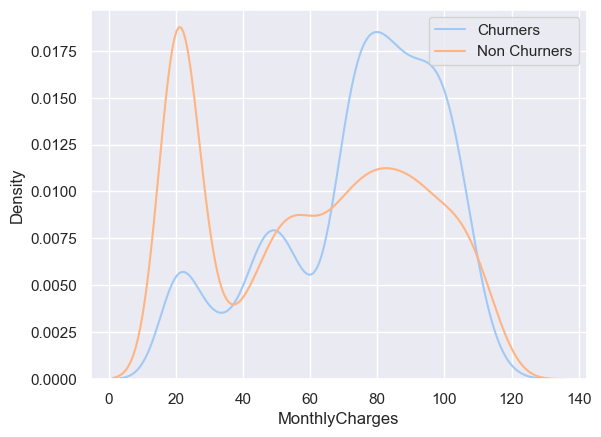

In [60]:
sns.kdeplot(data=df[df['Churn'] == True],x = 'MonthlyCharges',label = 'Churners')
sns.kdeplot(data=df[df['Churn'] == False],x = 'MonthlyCharges',label = 'Non Churners')
plt.legend(loc = 1)

Based on the above data, it can be inferred that there is an elevated churn rate associated with monthly charges exceeding $60.

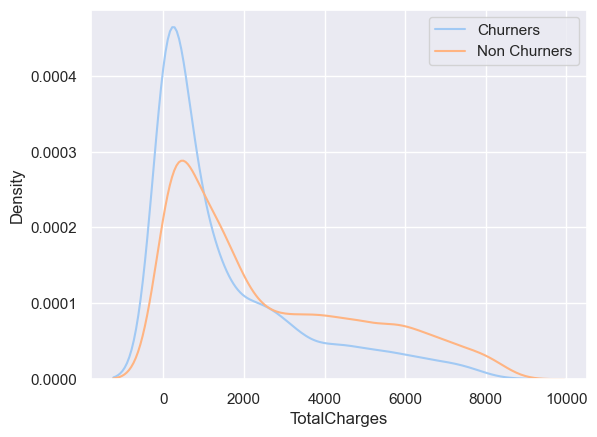

In [61]:
sns.kdeplot(data=df[df['Churn'] == True],x = 'TotalCharges',label = 'Churners')
sns.kdeplot(data=df[df['Churn'] == False],x = 'TotalCharges',label = 'Non Churners')
plt.legend(loc = 1)

**Unanticipated Discovery:** A remarkable revelation emerges as we observe a heightened churn rate associated with lower total charges.

However, a more comprehensive understanding materializes when we amalgamate the insights from three key parameters: Tenure, Monthly Charges, and Total Charges. Notably, a correlation surfaces where higher monthly charges align with shorter tenures, consequently leading to reduced total charges. This intriguing interplay unveils a noteworthy connection among these three factors: elevated monthly charges, shorter tenures, and diminished total charges, all contributing to a heightened likelihood of customer churn.

In [62]:
for col in df.columns:
    if len(df[col].unique()) < 10:
        print(col)
        print(df[col].unique())

gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
SeniorCitizen
[False  True]
Partner
[ True False]
Dependents
[False  True]
tenure
[1 3 4 2 6 5]
PhoneService
[False  True]
MultipleLines
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']
InternetService
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
OnlineBackup
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
DeviceProtection
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
TechSupport
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingTV
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
StreamingMovies
['No', 'Yes', 'No internet se

In [63]:
df.PhoneService = df.PhoneService.map({True : 'Yes',False:'No'})
df.PaperlessBilling = df.PaperlessBilling.map({True : 'Yes',False:'No'})

In [64]:
df.SeniorCitizen = df.SeniorCitizen.map({True : 'Yes',False:'No'})
df.Partner = df.Partner.map({True : 'Yes',False:'No'})
df.Dependents = df.Dependents.map({True : 'Yes',False:'No'})

In [65]:
df.MultipleLines.unique()

['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

In [66]:
df.Churn = df.Churn.map({True : 1,False : 0})

In [67]:
df_2 = df.copy()

In [68]:
lst = ['No internet service','Yes','No']
binary_lst = ['Yes','No']
ct = ColumnTransformer([('Ordinal',OrdinalEncoder(categories = [['No','DSL','Fiber optic'],
                                                  lst,lst,lst,lst,lst,lst,
                                                  ['One year','Two year','Month-to-month'],
                                                  ['Credit card (automatic)','Bank transfer (automatic)','Mailed check','Electronic check'],
                                                  binary_lst,binary_lst,binary_lst,
                                                  ['No','Yes'],['No','Yes']]),
                         ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']),
                        ('OneHot',OneHotEncoder(),['gender','MultipleLines'])],remainder='passthrough')

In [69]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Ordinal',
                                 OrdinalEncoder(categories=[['No', 'DSL',
                                                             'Fiber optic'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['No internet '
                                                             'service',
                                                             'Yes', 'No'],
                                                            ['One year',
                                                             'Two year'...
                                                             'Electronic '
                                                             'check'],
                                                            ['Yes', 'No'],
                                                            ['Yes', 'No'],
                                                            ['Yes', 'No'],
                                                            ['No', 'Yes'],
                                                            ['No', 'Yes']]),
                                 ['InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaymentMethod', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService',
                                  'PaperlessBilling']),
                                ('OneHot', OneHotEncoder(),
                                 ['gender', 'MultipleLines'])])

In [70]:
arr = ct.fit_transform(df)

In [71]:
lst = [col.split('__')[-1] for col in list(ct.get_feature_names_out())]

In [72]:
df_p = pd.DataFrame(data=arr,columns=lst)

In [73]:
df_p.sample(1)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen,...,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,customerID,tenure,MonthlyCharges,TotalCharges,Churn
1714,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,...,0.0,1.0,1.0,0.0,0.0,2081-VEYEH,1,107.95,318.6,0


Handling Imbalance data

In [74]:
df_p_churn = df_p[df_p['Churn'] == 1]
df_p_non_churn = df_p[df_p['Churn'] == 0]

In [75]:
df_p_churn.shape[0],df_p_non_churn.shape[0]

(1869, 5163)

In [76]:
rsampler = resample(df_p_churn,n_samples=df_p_non_churn.shape[0])

In [77]:
d = pd.concat([rsampler,df_p_non_churn],axis = 0)

In [78]:
d.drop(['customerID'],axis = 1,inplace=True)

In [79]:
for col in d.columns:
    d[col] = d[col].apply(lambda x : float(x))

In [80]:
class classification_metrics:
    
    def __init__(self,true,pred):
        
        self.true = true
        self.pred = pred
        self.accuracy = round(accuracy_score(self.true,self.pred)*100,2)
        self.error = round(100 - self.accuracy,2)
        self.f1_score = round(f1_score(self.true,self.pred),2)
        self.confusion_matrix = confusion_matrix(self.true,self.pred)
        
        self.true_negatives = self.confusion_matrix[0][0]
        self.true_positives = self.confusion_matrix[1][1]
        self.false_positives = self.confusion_matrix[0][1]
        self.false_negatives = self.confusion_matrix[1][0]
        
        self.true_positive_rate = round(self.true_positives/(self.true_positives+self.false_negatives),3)
        self.recall = self.true_positive_rate
        
        self.positive_predictive_rate = round(self.true_positives/(self.true_positives+self.false_positives),3)
        self.precision = self.positive_predictive_rate
        
        self.false_positive_rate = round(self.false_positives/(self.false_positives+self.true_negatives),3)
        self.type1_error = self.false_positive_rate
        
        self.false_negative_rate = round(self.false_negatives/(self.false_negatives+self.true_positives),3)
        self.type2_error = self.false_negative_rate

# Splitting the data

In [81]:
X = d.drop(['Churn'],axis = 1)
y = d['Churn']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [83]:
lr = LogisticRegression()

In [84]:
lr.fit(X_train,y_train)

LogisticRegression()

In [85]:
pred = lr.predict(X_test)

In [86]:
lr_metrics = classification_metrics(y_test,pred)

In [87]:
lr_metrics.accuracy

75.76

In [88]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', None],
         'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [89]:
lr_gs = GridSearchCV(estimator=lr,param_grid=params,cv = 10)

In [90]:
lr_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [91]:
lr_gs.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [92]:
pred = lr_gs.predict(X_test)

In [93]:
lr_metrics = classification_metrics(y_test,pred)

In [94]:
lr_metrics.accuracy

76.03

# Naive Bayes

In [95]:
nb = GaussianNB()

In [96]:
nb.fit(X_train,y_train)

GaussianNB()

In [97]:
pred = nb.predict(X_test)

In [98]:
nb_metrics = classification_metrics(y_test,pred)

In [99]:
nb_metrics.accuracy

73.97

In [100]:
nb_metrics.confusion_matrix

array([[1090,  572],
       [ 315, 1431]])

# Decision tree classifier

In [101]:
dt = DecisionTreeClassifier()

In [102]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
pred = dt.predict(X_test)

In [104]:
dt_metrics = classification_metrics(pred,y_test)

In [105]:
dt_metrics.accuracy

85.06

In [106]:
dt_metrics.confusion_matrix

array([[1291,  138],
       [ 371, 1608]])

In [107]:
params = {'criterion' : ["gini", "entropy", "log_loss"],
         'splitter' : ["best"]}

In [108]:
dt_gs = GridSearchCV(estimator=dt,param_grid=params,cv = 10,scoring='f1')

In [109]:
dt_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best']},
             scoring='f1')

In [110]:
dt_gs.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [111]:
pred = dt_gs.predict(X_test)

In [112]:
dt_gs_metrics = classification_metrics(y_test,pred)

In [113]:
dt_gs_metrics.accuracy

85.06

In [114]:
dt_gs_metrics.confusion_matrix

array([[1288,  374],
       [ 135, 1611]])

# K Nearest Neighbour Classifier

In [115]:
knn = KNeighborsClassifier()

In [116]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
pred = knn.predict(X_test)

In [118]:
knn_metrics = classification_metrics(y_test,pred)

In [119]:
knn_metrics.accuracy

74.94

In [120]:
knn_metrics.confusion_matrix

array([[1150,  512],
       [ 342, 1404]])

In [121]:
params = {'n_neighbors' : [x for x in range(1,15)]}

In [122]:
knn_gs = GridSearchCV(estimator=knn,param_grid=params,cv = 10,scoring='accuracy')

In [123]:
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

In [124]:
knn_gs.best_params_

{'n_neighbors': 1}

In [125]:
pred = knn_gs.predict(X_test)

In [126]:
knn_gs_metrics = classification_metrics(y_test,pred)

In [127]:
knn_gs_metrics.accuracy

84.62

In [128]:
knn_gs_metrics.confusion_matrix

array([[1297,  365],
       [ 159, 1587]])

# Support vector machines

In [129]:
svm = SVC()

In [130]:
svm.fit(X_train,y_train)

SVC()

In [131]:
pred = svm.predict(X_test)

In [132]:
svm_metrics = classification_metrics(y_test,pred)

In [133]:
svm_metrics.accuracy

63.29

In [134]:
svm_metrics.confusion_matrix

array([[1218,  444],
       [ 807,  939]])

In [135]:
params = {'kernel' : ['rbf'],
         'degree' : [i for i in range(2,4)],
         'gamma' : ['scale']}

In [136]:
svm_gs = GridSearchCV(estimator=svm,param_grid=params,scoring='accuracy',cv = 10)

In [137]:
svm_gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'degree': [2, 3], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [138]:
svm_gs.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [139]:
pred = svm_gs.predict(X_test)

In [140]:
svm_gs_metrics = classification_metrics(y_test,pred)

In [141]:
svm_gs_metrics.accuracy

63.29

In [142]:
svm_gs_metrics.confusion_matrix

array([[1218,  444],
       [ 807,  939]])

# Random forest classifier

In [143]:
rf = RandomForestClassifier()

In [144]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
pred = rf.predict(X_test)

In [146]:
rf_metrics = classification_metrics(y_test,pred)

In [147]:
rf_metrics.accuracy

88.09

In [148]:
rf_metrics.confusion_matrix

array([[1373,  289],
       [ 117, 1629]])

# XGBoost

In [149]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [150]:
pred = model.predict(X_test)

In [151]:
xgb_metrics = classification_metrics(y_test,pred)

In [152]:
xgb_metrics.accuracy

84.54

In [153]:
xgb_metrics.confusion_matrix

array([[1306,  356],
       [ 171, 1575]])

# Voting technique

In [154]:
from sklearn.ensemble import VotingClassifier

In [155]:
estimators = [('dt_gs',dt_gs),('knn_gs',knn_gs),('rf',rf),('xgb',model)]

In [156]:
vc = VotingClassifier(estimators=estimators)

In [157]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('dt_gs',
                              GridSearchCV(cv=10,
                                           estimator=DecisionTreeClassifier(),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy',
                                                                     'log_loss'],
                                                       'splitter': ['best']},
                                           scoring='f1')),
                             ('knn_gs',
                              GridSearchCV(cv=10,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14]},
                                           scoring='accuracy')),
                             ('rf', RandomForestClass...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [158]:
pred = vc.predict(X_test)

In [159]:
vc_metrics = classification_metrics(y_test,pred)

In [160]:
vc_metrics.accuracy

89.32

In [161]:
vc_metrics.confusion_matrix

array([[1433,  229],
       [ 135, 1611]])

# Bagging

In [162]:
bc = BaggingClassifier(estimator=model)

In [163]:
bc.fit(X_train,y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))

In [164]:
pred = bc.predict(X_test)

In [165]:
bc_metrics = classification_metrics(y_test,pred)

In [166]:
bc_metrics.accuracy

83.8

In [167]:
bc_metrics.confusion_matrix

array([[1298,  364],
       [ 188, 1558]])

# Stacking Technique

In [168]:
from sklearn.ensemble import StackingClassifier

In [169]:
base_models = [('dt_gs',dt_gs),('knn_gs',knn_gs),('rf',rf)]

In [170]:
sc = StackingClassifier(estimators=base_models,final_estimator=model,cv = 10)

In [171]:
sc.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('dt_gs',
                                GridSearchCV(cv=10,
                                             estimator=DecisionTreeClassifier(),
                                             param_grid={'criterion': ['gini',
                                                                       'entropy',
                                                                       'log_loss'],
                                                         'splitter': ['best']},
                                             scoring='f1')),
                               ('knn_gs',
                                GridSearchCV(cv=10,
                                             estimator=KNeighborsClassifier(),
                                             param_grid={'n_neighbors': [1, 2,
                                                                         3, 4,
                                                                         5, 6,
                                                                         7, 8,
                                                                         9, 10,
                                                                         11, 12,
                                                                         13,
                                                                         14]},
                                             scoring='accuracy')),
                               ('rf', RandomFor...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [172]:
pred = sc.predict(X_test)

In [173]:
sc_metrics = classification_metrics(y_test,pred)

In [174]:
sc_metrics.accuracy

90.02